In [2]:
import sys
sys.path.append("/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/poc")
sys.path.append("/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/plugins")
sys.path.append("/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/dags")

#Import libs python
from pyspark.sql.types import *
from pyspark.sql.functions import *
from datetime import date

#Import libs internas
from utils import spark_utils_session as utils

from hooks.hdfs.hdfs_helper import HdfsHelper
from jobs.job_base_config import BaseETLJobClass

import poc_helper
poc_helper.load_env("PROD")

/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/plugins/hooks/db/airflow_metastore_helper.py:10 DeprecatedImportWarning: The `airflow.utils.xcom.XCOM_RETURN_KEY` attribute is deprecated. Please use `'airflow.models.xcom.XCOM_RETURN_KEY'`.

/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/plugins/hooks/db/impala_helper.py:6 DeprecatedImportWarning: The `airflow.hooks.base.BaseHook` attribute is deprecated. Please use `'airflow.sdk.bases.hook.BaseHook'`.

/home/tsevero/notebooks/SAT_BIG_DATA/data-pipeline/batch/plugins/hooks/db/postgres_helper.py:4 DeprecatedImportWarning: The `airflow.hooks.base.BaseHook` attribute is deprecated. Please use `'airflow.sdk.bases.hook.BaseHook'`.

'.env_file' loaded!
ENV 'PROD' configured!


In [3]:
def get_session(profile: str, dynamic_allocation_enabled: bool = True) -> utils.DBASparkAppSession:
    """Generates DBASparkAppSession."""
    
    app_name = "tsevero_setores"
    
    
    spark_builder = (utils.DBASparkAppSession
                     .builder
                     .setAppName(app_name)
                     .usingProcessProfile(profile)
                    )
    
    if dynamic_allocation_enabled:
        spark_builder.autoResourceManagement()

    return spark_builder.build()

session = get_session(profile='efd_t2')

2025-10-02T21:08:26.719333Z [info     ] Using json file settings.      [root] loc=spark_utils_session.py:301
2025-10-02T21:08:26.720820Z [info     ] Exporting default ENV.         [root] loc=spark_utils_session.py:305
2025-10-02T21:08:26.721399Z [info     ] Exporting custom ENVs.         [root] loc=spark_utils_session.py:338
2025-10-02T21:08:26.721751Z [info     ] Building profile 'efd_t2'.     [root] loc=spark_utils_session.py:221
2025-10-02T21:08:26.722132Z [info     ] Not enough info for building the kerberos client. Ignoring it [root] loc=spark_utils_session.py:284


:: loading settings :: url = jar:file:/opt/cloudera/parcels/SPARK3-3.5.4.3.5.7191000.0-30-1.p0.68499982/lib/spark3/jars/ivy-2.5.2.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/tsevero/.ivy2/cache
The jars for the packages stored in: /home/tsevero/.ivy2/jars
com.databricks#spark-xml_2.12 added as a dependency
org.apache.iceberg#iceberg-spark-runtime-3.5_2.12 added as a dependency
com.oracle.database.security#oraclepki added as a dependency
com.oracle.database.security#osdt_core added as a dependency
com.oracle.database.security#osdt_cert added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-26e7e499-90e0-4094-9c63-6da0778f1271;1.0
	confs: [default]
	found com.databricks#spark-xml_2.12;0.18.0 in central
	found commons-io#commons-io;2.11.0 in central
	found org.glassfish.jaxb#txw2;3.0.2 in central
	found org.apache.ws.xmlschema#xmlschema-core;2.3.0 in central
	found org.scala-lang.modules#scala-collection-compat_2.12;2.9.0 in central
	found org.apache.iceberg#iceberg-spark-runtime-3.5_2.12;1.9.2 in central
	found com.oracle.database.security#oraclepki;21.18.0.0 in central
	found com.oracle.databa

In [5]:
session.sparkSession.sql("SHOW DATABASES").show(truncate=False)

Hive Session ID = 8e47e667-2c0c-486f-a504-d8bc0c800547


+------------------+
|namespace         |
+------------------+
|anac              |
|bcadastro         |
|bpe               |
|c115              |
|ccc               |
|ccg               |
|cte               |
|default           |
|destda            |
|detran_share      |
|dime              |
|due               |
|efd               |
|fci               |
|gecob             |
|gescol            |
|gessimples        |
|gplam             |
|information_schema|
|malhas            |
+------------------+
only showing top 20 rows



In [15]:
# =============================================================================
# SISTEMA DE ANÁLISE TRIBUTÁRIA SETORIAL v4.0 - ANÁLISE COMPLETA COM ML
# Receita Estadual de Santa Catarina
# =============================================================================
# Este script realiza análises avançadas usando Spark SQL para processamento
# e bibliotecas Python (Pandas, Matplotlib, Seaborn, Plotly, Scikit-learn) 
# para visualizações e machine learning.
# =============================================================================

from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Sklearn para ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, davies_bouldin_score

# =============================================================================
# PREVENÇÃO DE CONFLITOS: Python Built-ins vs PySpark
# =============================================================================
import builtins
import numpy as np

# Salvar referências às funções built-in que conflitam com PySpark
max_builtin = builtins.max
min_builtin = builtins.min
abs_builtin = builtins.abs
sum_builtin = builtins.sum
round_builtin = builtins.round

print("✅ Funções built-in protegidas contra conflitos com PySpark")
print("   Use: max_builtin(), min_builtin(), abs_builtin(), sum_builtin(), round_builtin()")
print("   Ou use as versões do numpy: np.abs(), np.max(), np.min(), etc.")

# Configurações visuais
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 11

print("=" * 80)
print("SISTEMA DE ANÁLISE TRIBUTÁRIA SETORIAL v4.0 - ANÁLISE COMPLETA COM ML")
print("=" * 80)
print(f"Iniciado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Verificar sessão Spark
try:
    if 'session' in locals():
        spark = session.sparkSession
        print(f"✅ Sessão Spark disponível: {spark.sparkContext.appName}")
    elif 'spark' in locals():
        print(f"✅ Sessão Spark disponível")
    else:
        raise NameError("Sessão Spark não encontrada.")
except Exception as e:
    print(f"❌ ERRO: {e}")
    print("Execute primeiro o código de configuração da sessão Spark.")
    raise

# =============================================================================
# PARTE 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS")
print("=" * 80)

# Carregar dados das views principais
print("\n📊 Carregando dados das views do sistema...")

try:
    # Benchmark Setorial
    df_benchmark = spark.table("niat.argos_benchmark_setorial")
    total_benchmark = df_benchmark.count()
    print(f"✅ Benchmark Setorial: {total_benchmark:,} registros")
    
    # Empresas vs Benchmark
    df_empresas = spark.table("niat.argos_empresa_vs_benchmark")
    total_empresas = df_empresas.count()
    print(f"✅ Empresas vs Benchmark: {total_empresas:,} registros")
    
    # Evolução Temporal Setorial
    df_evolucao_setor = spark.table("niat.argos_evolucao_temporal_setor")
    total_evo_setor = df_evolucao_setor.count()
    print(f"✅ Evolução Setorial: {total_evo_setor:,} setores")
    
    # Alertas
    df_alertas = spark.table("niat.argos_alertas_empresas")
    total_alertas = df_alertas.count()
    print(f"✅ Alertas: {total_alertas:,} registros")
    
except Exception as e:
    print(f"❌ ERRO ao carregar dados: {e}")
    print("Certifique-se de que o script SQL v4.0 foi executado completamente.")
    raise



✅ Funções built-in protegidas contra conflitos com PySpark
   Use: max_builtin(), min_builtin(), abs_builtin(), sum_builtin(), round_builtin()
   Ou use as versões do numpy: np.abs(), np.max(), np.min(), etc.
SISTEMA DE ANÁLISE TRIBUTÁRIA SETORIAL v4.0 - ANÁLISE COMPLETA COM ML
Iniciado em: 2025-10-02 18:28:29
✅ Sessão Spark disponível: tsevero_setores

PARTE 1: CARREGAMENTO E PREPARAÇÃO DOS DADOS

📊 Carregando dados das views do sistema...
✅ Benchmark Setorial: 2,751 registros
✅ Empresas vs Benchmark: 464,046 registros
✅ Evolução Setorial: 341 setores
✅ Alertas: 140,335 registros



PARTE 2: ANÁLISE EXPLORATÓRIA E ESTATÍSTICAS DESCRITIVAS

📈 2.1. ESTATÍSTICAS GERAIS DO SISTEMA
--------------------------------------------------------------------------------



MÉTRICAS PRINCIPAIS:
  • total_setores: 342
  • total_empresas: 71,631
  • total_periodos: 1
  • faturamento_total_bilhoes: 100.89
  • icms_devido_bilhoes: 11.84
  • aliq_media_sistema_pct: 57.01
  • empresas_risco_critico: 5,525

📊 2.2. DISTRIBUIÇÃO POR PORTE EMPRESARIAL
--------------------------------------------------------------------------------
porte_empresa  qtd_empresas faturamento_medio aliq_media_pct
        MICRO         15691           2319.25         467.19
      PEQUENO         18885         177509.69          24.14
        MEDIO         18363        1366587.31          12.63
       GRANDE          3325       21776681.64          11.60


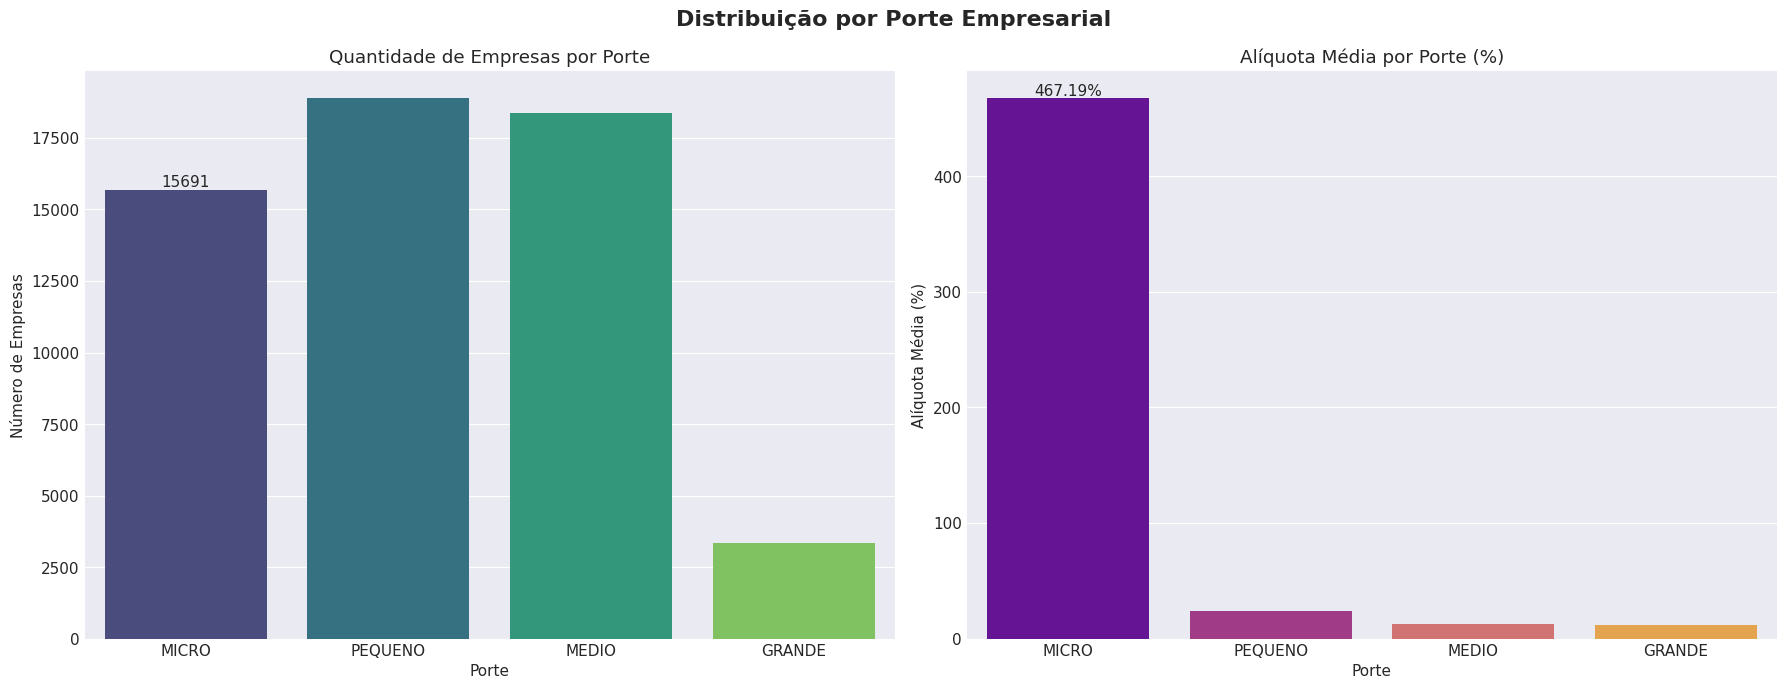

In [8]:
# =============================================================================
# PARTE 2: ANÁLISE EXPLORATÓRIA E ESTATÍSTICAS DESCRITIVAS
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 2: ANÁLISE EXPLORATÓRIA E ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)

# 2.1. Estatísticas Gerais do Sistema
print("\n📈 2.1. ESTATÍSTICAS GERAIS DO SISTEMA")
print("-" * 80)

stats_gerais = spark.sql("""
SELECT 
    COUNT(DISTINCT b.cnae_classe) AS total_setores,
    COUNT(DISTINCT e.nu_cnpj) AS total_empresas,
    COUNT(DISTINCT e.nu_per_ref) AS total_periodos,
    ROUND(SUM(e.vl_faturamento) / 1e9, 2) AS faturamento_total_bilhoes,
    ROUND(SUM(e.icms_devido) / 1e9, 2) AS icms_devido_bilhoes,
    ROUND(AVG(e.aliq_efetiva) * 100, 2) AS aliq_media_sistema_pct,
    COUNT(DISTINCT CASE WHEN a.severidade = 'CRITICO' THEN e.nu_cnpj END) AS empresas_risco_critico
FROM niat.argos_empresas e
LEFT JOIN niat.argos_benchmark_setorial b ON e.cnae_classe = b.cnae_classe AND e.nu_per_ref = b.nu_per_ref
LEFT JOIN niat.argos_alertas_empresas a ON e.nu_cnpj = a.nu_cnpj AND e.nu_per_ref = a.nu_per_ref
WHERE e.nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_empresas)
""").toPandas()

print("\nMÉTRICAS PRINCIPAIS:")
for col in stats_gerais.columns:
    valor = stats_gerais[col].iloc[0]
    print(f"  • {col}: {valor:,.2f}" if isinstance(valor, float) else f"  • {col}: {valor:,}")

# 2.2. Distribuição por Porte
print("\n📊 2.2. DISTRIBUIÇÃO POR PORTE EMPRESARIAL")
print("-" * 80)

dist_porte = spark.sql("""
SELECT 
    porte_empresa,
    COUNT(DISTINCT nu_cnpj) AS qtd_empresas,
    ROUND(AVG(vl_faturamento), 2) AS faturamento_medio,
    ROUND(AVG(aliq_efetiva) * 100, 2) AS aliq_media_pct
FROM niat.argos_empresas
WHERE nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_empresas)
  AND porte_empresa != 'SEM_FATURAMENTO'
GROUP BY porte_empresa
ORDER BY 
    CASE porte_empresa
        WHEN 'MICRO' THEN 1
        WHEN 'PEQUENO' THEN 2
        WHEN 'MEDIO' THEN 3
        WHEN 'GRANDE' THEN 4
    END
""").toPandas()

print(dist_porte.to_string(index=False))

# Visualização: Distribuição por Porte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Distribuição por Porte Empresarial', fontsize=16, fontweight='bold')

sns.barplot(data=dist_porte, x='porte_empresa', y='qtd_empresas', ax=ax1, palette='viridis')
ax1.set_title('Quantidade de Empresas por Porte')
ax1.set_xlabel('Porte')
ax1.set_ylabel('Número de Empresas')
ax1.bar_label(ax1.containers[0], fmt='%d')

sns.barplot(data=dist_porte, x='porte_empresa', y='aliq_media_pct', ax=ax2, palette='plasma')
ax2.set_title('Alíquota Média por Porte (%)')
ax2.set_xlabel('Porte')
ax2.set_ylabel('Alíquota Média (%)')
ax2.bar_label(ax2.containers[0], fmt='%.2f%%')

plt.tight_layout()
plt.show()



PARTE 3: VISUALIZAÇÕES AVANÇADAS

📈 3.1. EVOLUÇÃO TEMPORAL DOS TOP 10 SETORES
--------------------------------------------------------------------------------


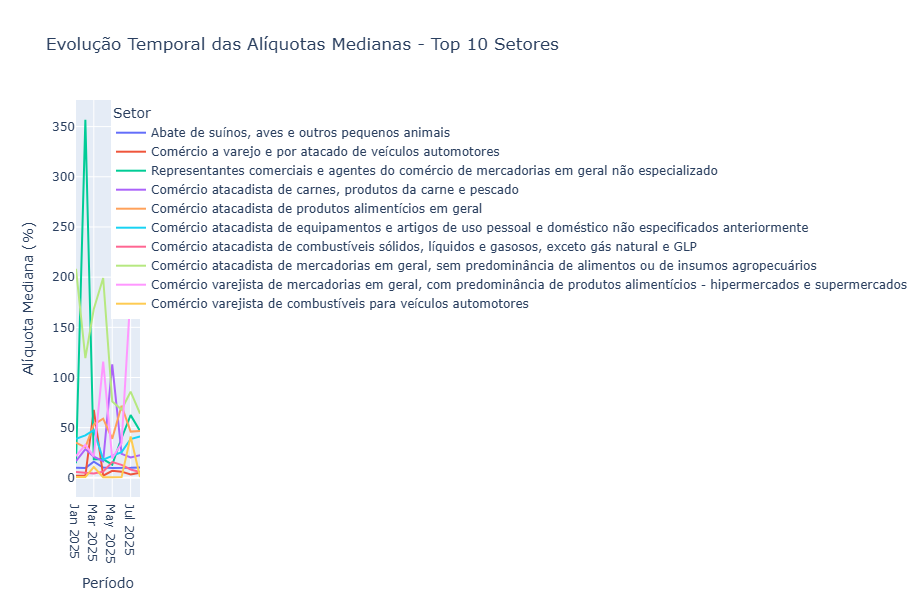


🔥 3.2. MAPA DE CALOR: ALÍQUOTAS POR CNAE
--------------------------------------------------------------------------------


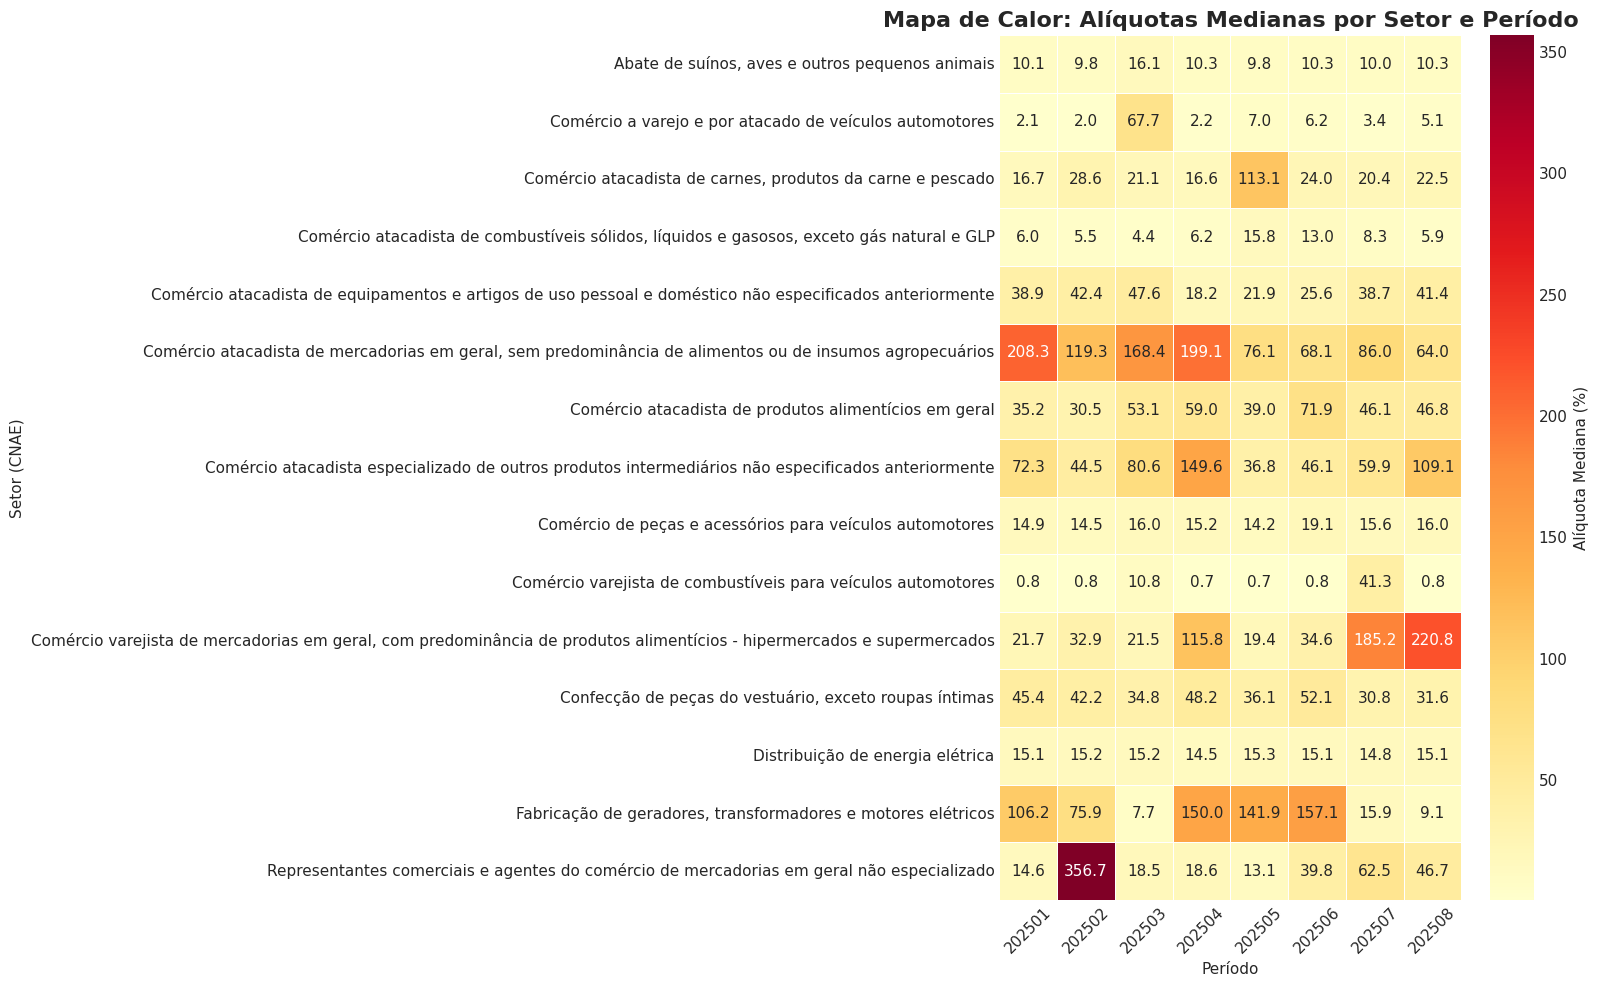


📊 3.3. DISTRIBUIÇÃO POR QUARTIL DE ALÍQUOTA
--------------------------------------------------------------------------------
        quartil  qtd_empresas  faturamento_medio_milhoes
Q1 (Abaixo P25)          1874                       3.57
   Q2 (P25-P50)         26443                       2.55
   Q3 (P50-P75)          4280                       2.68
 Q4 (Acima P75)          1968                       2.76


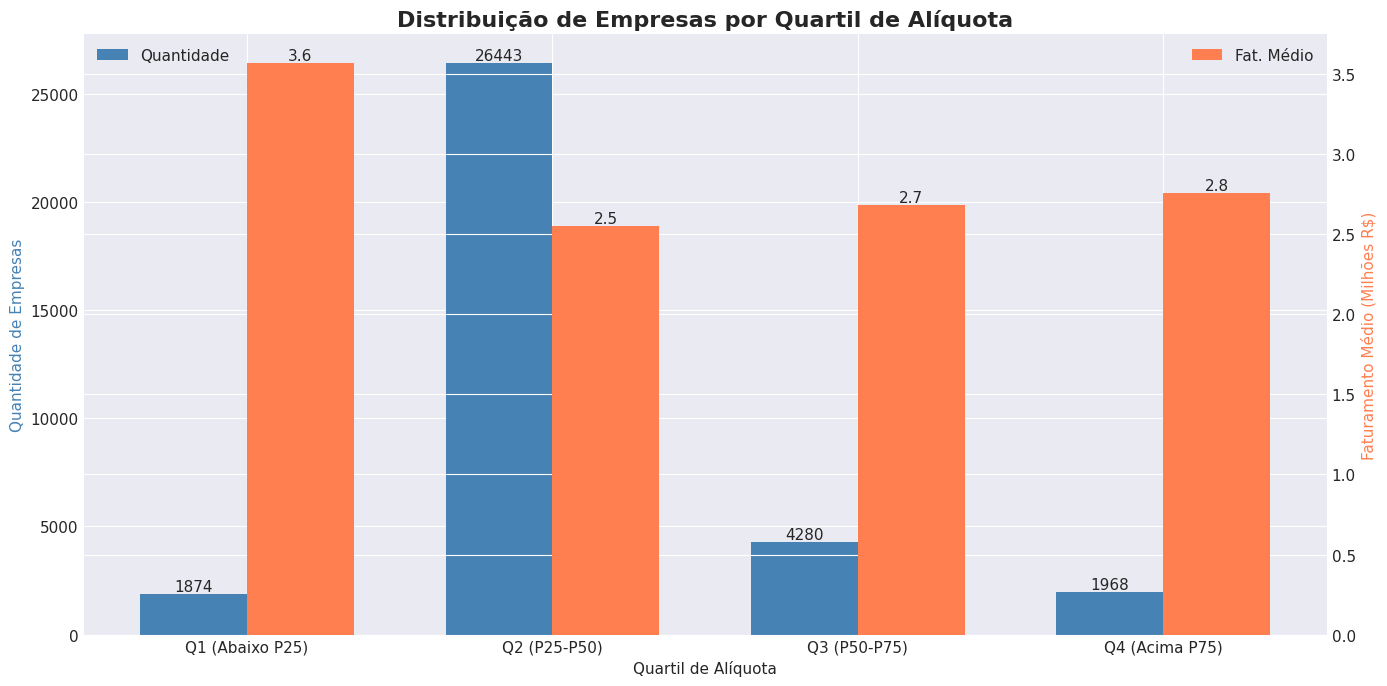


💰 3.4. ANÁLISE DE DIVERGÊNCIAS ICMS vs PAGAMENTOS
--------------------------------------------------------------------------------
          tipo_divergencia  qtd_empresas  icms_total_milhoes  pagto_total_milhoes
             Sem Pagamento          3981               95.80                 0.00
Divergência Extrema (>50%)          6182              346.26               581.63
 Divergência Alta (30-50%)          1936              198.52               171.57
Divergência Média (10-30%)          3545              460.73               433.01
             Normal (<10%)         16615              515.02               915.83


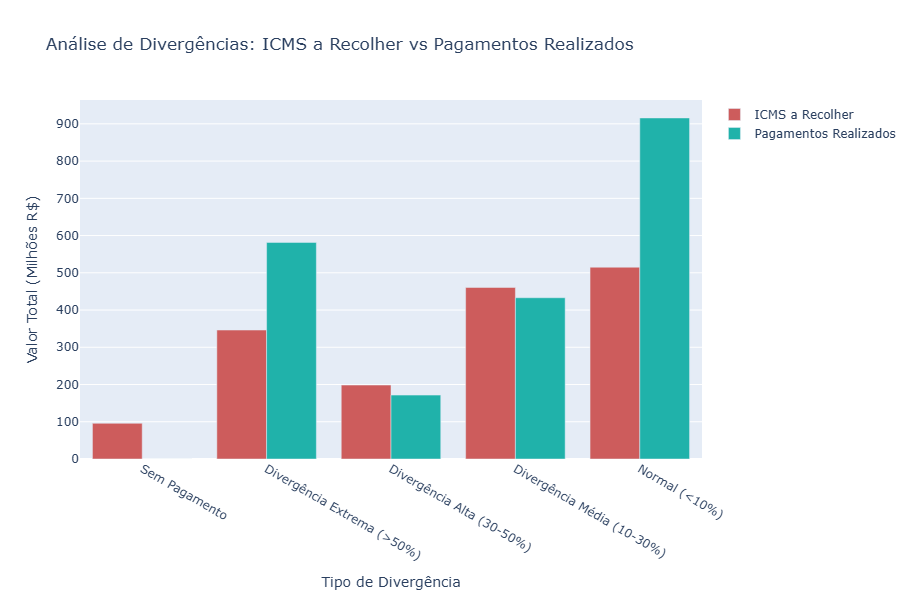


⚠️ 3.5. RANKING DE SETORES COM ANOMALIAS
--------------------------------------------------------------------------------
cnae_classe                                                                                                       desc_cnae_classe             tipo_anomalia severidade  score  qtd_empresas_total  faturamento_bilhoes aliq_setor_pct aliq_economia_pct
      47113 Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - hipermercados e supermercados ALTA_VOLATILIDADE_INTERNA       ALTA  142.1                1815                 5.31         220.78             73.03
      45111                                                                Comércio a varejo e por atacado de veículos automotores ALTA_VOLATILIDADE_INTERNA       ALTA  132.5                3849                 4.21           5.10             73.03
      46818                              Comércio atacadista de combustíveis sólidos, líquidos e gasosos, exceto gás natural e GLP

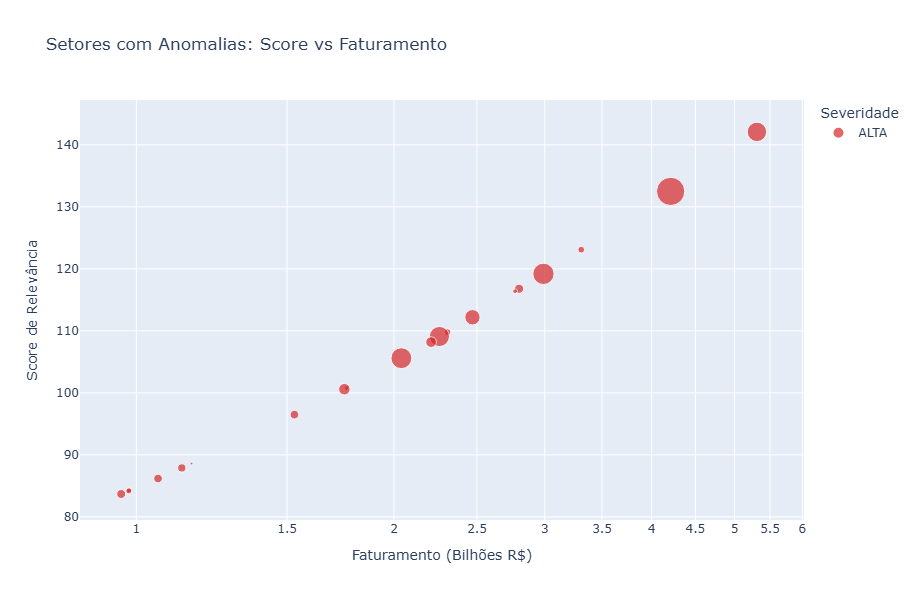

In [9]:
# =============================================================================
# PARTE 3: VISUALIZAÇÕES AVANÇADAS
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 3: VISUALIZAÇÕES AVANÇADAS")
print("=" * 80)

# 3.1. Evolução Temporal por Setor (Top 10)
print("\n📈 3.1. EVOLUÇÃO TEMPORAL DOS TOP 10 SETORES")
print("-" * 80)

evolucao_top_setores = spark.sql("""
WITH top_setores AS (
    SELECT cnae_classe
    FROM niat.argos_evolucao_temporal_setor
    ORDER BY faturamento_acumulado_8m DESC
    LIMIT 10
)
SELECT 
    b.nu_per_ref,
    b.cnae_classe,
    b.desc_cnae_classe,
    ROUND(b.aliq_efetiva_mediana * 100, 2) AS aliq_mediana_pct,
    ROUND(b.faturamento_total / 1e6, 2) AS faturamento_milhoes
FROM niat.argos_benchmark_setorial b
INNER JOIN top_setores ts ON b.cnae_classe = ts.cnae_classe
ORDER BY b.cnae_classe, b.nu_per_ref
""").toPandas()

# Converter período para datetime
evolucao_top_setores['periodo_dt'] = pd.to_datetime(evolucao_top_setores['nu_per_ref'], format='%Y%m')

# Converter Decimal para float
evolucao_top_setores['aliq_mediana_pct'] = evolucao_top_setores['aliq_mediana_pct'].astype(float)
evolucao_top_setores['faturamento_milhoes'] = evolucao_top_setores['faturamento_milhoes'].astype(float)

# Gráfico interativo com Plotly
fig = px.line(evolucao_top_setores, 
              x='periodo_dt', 
              y='aliq_mediana_pct',
              color='desc_cnae_classe',
              title='Evolução Temporal das Alíquotas Medianas - Top 10 Setores',
              labels={'periodo_dt': 'Período', 
                     'aliq_mediana_pct': 'Alíquota Mediana (%)',
                     'desc_cnae_classe': 'Setor'},
              hover_data=['faturamento_milhoes'])
fig.update_layout(height=600, hovermode='x unified')
fig.show()

# 3.2. Mapa de Calor: Alíquotas por CNAE e Período
print("\n🔥 3.2. MAPA DE CALOR: ALÍQUOTAS POR CNAE")
print("-" * 80)

heatmap_data = spark.sql("""
SELECT 
    cnae_classe,
    desc_cnae_classe,
    nu_per_ref,
    ROUND(aliq_efetiva_mediana * 100, 2) AS aliq_mediana_pct
FROM niat.argos_benchmark_setorial
WHERE cnae_classe IN (
    SELECT cnae_classe 
    FROM niat.argos_evolucao_temporal_setor 
    ORDER BY faturamento_acumulado_8m DESC 
    LIMIT 15
)
ORDER BY cnae_classe, nu_per_ref
""").toPandas()

# Pivotar dados para matriz
heatmap_pivot = heatmap_data.pivot(index='desc_cnae_classe', columns='nu_per_ref', values='aliq_mediana_pct')

# Converter Decimal para float
heatmap_pivot = heatmap_pivot.astype(float)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_pivot, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Alíquota Mediana (%)'})
plt.title('Mapa de Calor: Alíquotas Medianas por Setor e Período', fontsize=16, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Setor (CNAE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.3. Distribuição de Empresas por Quartil de Alíquota
print("\n📊 3.3. DISTRIBUIÇÃO POR QUARTIL DE ALÍQUOTA")
print("-" * 80)

quartis_data = spark.sql("""
SELECT 
    CASE 
        WHEN aliq_efetiva_empresa < aliq_setor_p25 THEN 'Q1 (Abaixo P25)'
        WHEN aliq_efetiva_empresa < aliq_setor_mediana THEN 'Q2 (P25-P50)'
        WHEN aliq_efetiva_empresa < aliq_setor_p75 THEN 'Q3 (P50-P75)'
        ELSE 'Q4 (Acima P75)'
    END AS quartil,
    COUNT(*) AS qtd_empresas,
    ROUND(AVG(vl_faturamento) / 1e6, 2) AS faturamento_medio_milhoes
FROM niat.argos_empresa_vs_benchmark
WHERE nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_empresa_vs_benchmark)
  AND aliq_efetiva_empresa IS NOT NULL
GROUP BY 1
ORDER BY 1
""").toPandas()

print(quartis_data.to_string(index=False))

# Converter Decimal para float
quartis_data['qtd_empresas'] = quartis_data['qtd_empresas'].astype(int)
quartis_data['faturamento_medio_milhoes'] = quartis_data['faturamento_medio_milhoes'].astype(float)

# Visualização
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(quartis_data))
width = 0.35

bars1 = ax.bar(x - width/2, quartis_data['qtd_empresas'], width, label='Quantidade', color='steelblue')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, quartis_data['faturamento_medio_milhoes'], width, label='Fat. Médio', color='coral')

ax.set_xlabel('Quartil de Alíquota')
ax.set_ylabel('Quantidade de Empresas', color='steelblue')
ax2.set_ylabel('Faturamento Médio (Milhões R$)', color='coral')
ax.set_title('Distribuição de Empresas por Quartil de Alíquota', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quartis_data['quartil'])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.bar_label(bars1, fmt='%d')
ax2.bar_label(bars2, fmt='%.1f')

plt.tight_layout()
plt.show()

# 3.4. Análise de Divergências ICMS vs Pagamentos
print("\n💰 3.4. ANÁLISE DE DIVERGÊNCIAS ICMS vs PAGAMENTOS")
print("-" * 80)

divergencias = spark.sql("""
SELECT 
    CASE
        WHEN icms_recolher > 100 AND valor_total_pago = 0 THEN 'Sem Pagamento'
        WHEN ABS(icms_recolher - valor_total_pago) / NULLIF(icms_recolher, 0) > 0.5 THEN 'Divergência Extrema (>50%)'
        WHEN ABS(icms_recolher - valor_total_pago) / NULLIF(icms_recolher, 0) > 0.3 THEN 'Divergência Alta (30-50%)'
        WHEN ABS(icms_recolher - valor_total_pago) / NULLIF(icms_recolher, 0) > 0.1 THEN 'Divergência Média (10-30%)'
        ELSE 'Normal (<10%)'
    END AS tipo_divergencia,
    COUNT(*) AS qtd_empresas,
    ROUND(SUM(icms_recolher) / 1e6, 2) AS icms_total_milhoes,
    ROUND(SUM(valor_total_pago) / 1e6, 2) AS pagto_total_milhoes
FROM niat.argos_empresa_vs_benchmark
WHERE nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_empresa_vs_benchmark)
  AND icms_recolher IS NOT NULL
GROUP BY 1
ORDER BY 
    CASE tipo_divergencia
        WHEN 'Sem Pagamento' THEN 1
        WHEN 'Divergência Extrema (>50%)' THEN 2
        WHEN 'Divergência Alta (30-50%)' THEN 3
        WHEN 'Divergência Média (10-30%)' THEN 4
        ELSE 5
    END
""").toPandas()

print(divergencias.to_string(index=False))

# Converter Decimal para float
divergencias['icms_total_milhoes'] = divergencias['icms_total_milhoes'].astype(float)
divergencias['pagto_total_milhoes'] = divergencias['pagto_total_milhoes'].astype(float)

# Visualização com Plotly
fig = go.Figure()
fig.add_trace(go.Bar(name='ICMS a Recolher', x=divergencias['tipo_divergencia'], y=divergencias['icms_total_milhoes'], marker_color='indianred'))
fig.add_trace(go.Bar(name='Pagamentos Realizados', x=divergencias['tipo_divergencia'], y=divergencias['pagto_total_milhoes'], marker_color='lightseagreen'))
fig.update_layout(
    title='Análise de Divergências: ICMS a Recolher vs Pagamentos Realizados',
    xaxis_title='Tipo de Divergência',
    yaxis_title='Valor Total (Milhões R$)',
    barmode='group',
    height=600
)
fig.show()

# 3.5. Ranking de Setores com Anomalias
print("\n⚠️ 3.5. RANKING DE SETORES COM ANOMALIAS")
print("-" * 80)

anomalias_ranking = spark.sql("""
SELECT 
    ans.cnae_classe,
    ans.desc_cnae_classe,
    ans.tipo_anomalia,
    ans.severidade,
    ROUND(ans.score_relevancia, 1) AS score,
    ans.qtd_empresas_total,
    ROUND(ans.faturamento_total / 1e9, 2) AS faturamento_bilhoes,
    ROUND(ans.aliq_setor * 100, 2) AS aliq_setor_pct,
    ROUND(ans.aliq_mediana_economia * 100, 2) AS aliq_economia_pct
FROM niat.argos_anomalias_setoriais ans
WHERE nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_anomalias_setoriais)
ORDER BY ans.score_relevancia DESC
LIMIT 20
""").toPandas()

print(anomalias_ranking.to_string(index=False))

# Converter Decimal para float
anomalias_ranking['faturamento_bilhoes'] = anomalias_ranking['faturamento_bilhoes'].astype(float)
anomalias_ranking['score'] = anomalias_ranking['score'].astype(float)
anomalias_ranking['aliq_setor_pct'] = anomalias_ranking['aliq_setor_pct'].astype(float)

# Visualização
fig = px.scatter(anomalias_ranking,
                x='faturamento_bilhoes',
                y='score',
                size='qtd_empresas_total',
                color='severidade',
                hover_name='desc_cnae_classe',
                hover_data=['tipo_anomalia', 'aliq_setor_pct'],
                title='Setores com Anomalias: Score vs Faturamento',
                labels={'faturamento_bilhoes': 'Faturamento (Bilhões R$)',
                       'score': 'Score de Relevância',
                       'severidade': 'Severidade'},
                color_discrete_map={'ALTA': '#d62728', 'MEDIA': '#ff7f0e', 'BAIXA': '#2ca02c'},
                height=600)
fig.update_xaxes(type='log')
fig.show()



PARTE 4: ANÁLISES ESTATÍSTICAS AVANÇADAS COM MACHINE LEARNING

🔬 4.1. CLUSTERING DE SETORES SIMILARES (K-MEANS)
--------------------------------------------------------------------------------


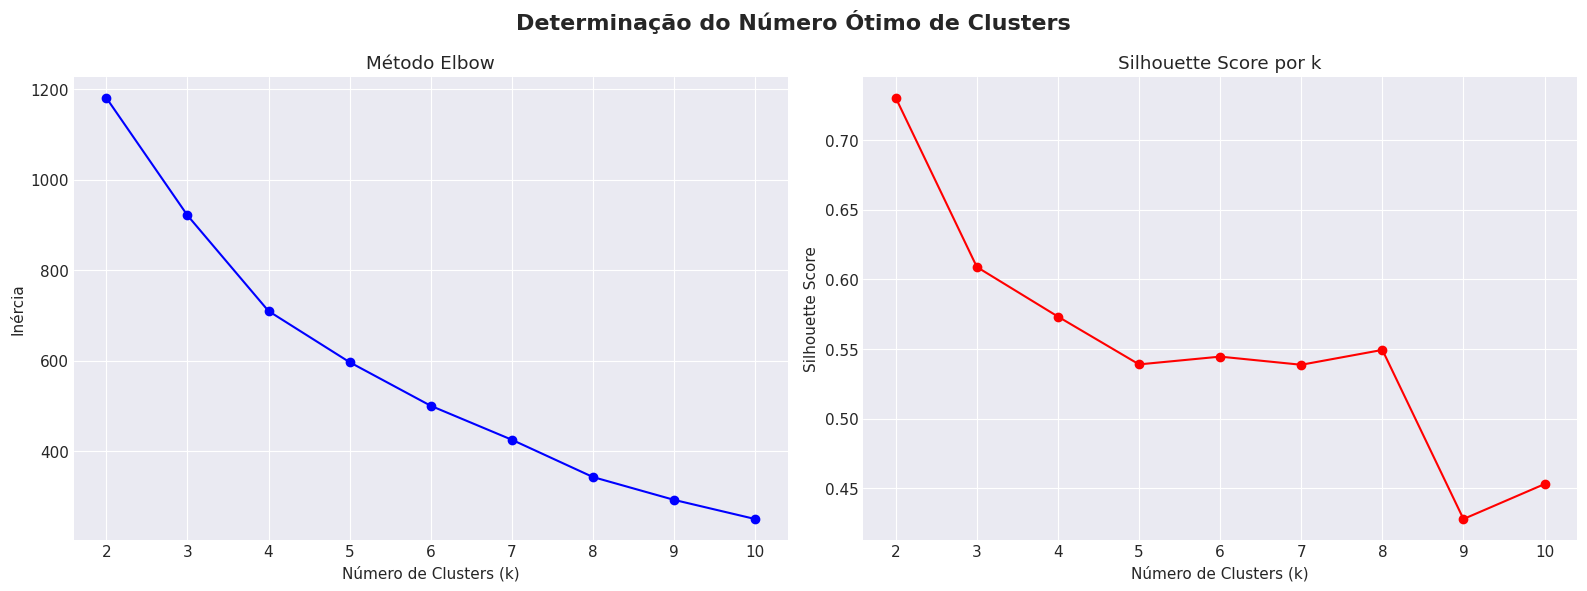


✅ Número ótimo de clusters: 2 (Silhouette Score: 0.730)

CARACTERÍSTICAS DOS 2 CLUSTERS IDENTIFICADOS:
--------------------------------------------------------------------------------

Cluster 0 (320 setores):
  Alíquota Média: 1.1198
  Volatilidade Média: 0.506
  Faturamento Médio: R$ 1.33 bilhões
  Setores representativos:
    • Fabricação de geradores, transformadores e motores elétricos
    • Comércio atacadista de bebidas
    • Comércio atacadista de instrumentos e materiais para uso médico, cirúrgico, ortopédico e odontológico

Cluster 1 (18 setores):
  Alíquota Média: 0.4759
  Volatilidade Média: 0.663
  Faturamento Médio: R$ 21.46 bilhões
  Setores representativos:
    • Representantes comerciais e agentes do comércio de mercadorias em geral não especializado
    • Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - hipermercados e supermercados
    • Comércio a varejo e por atacado de veículos automotores


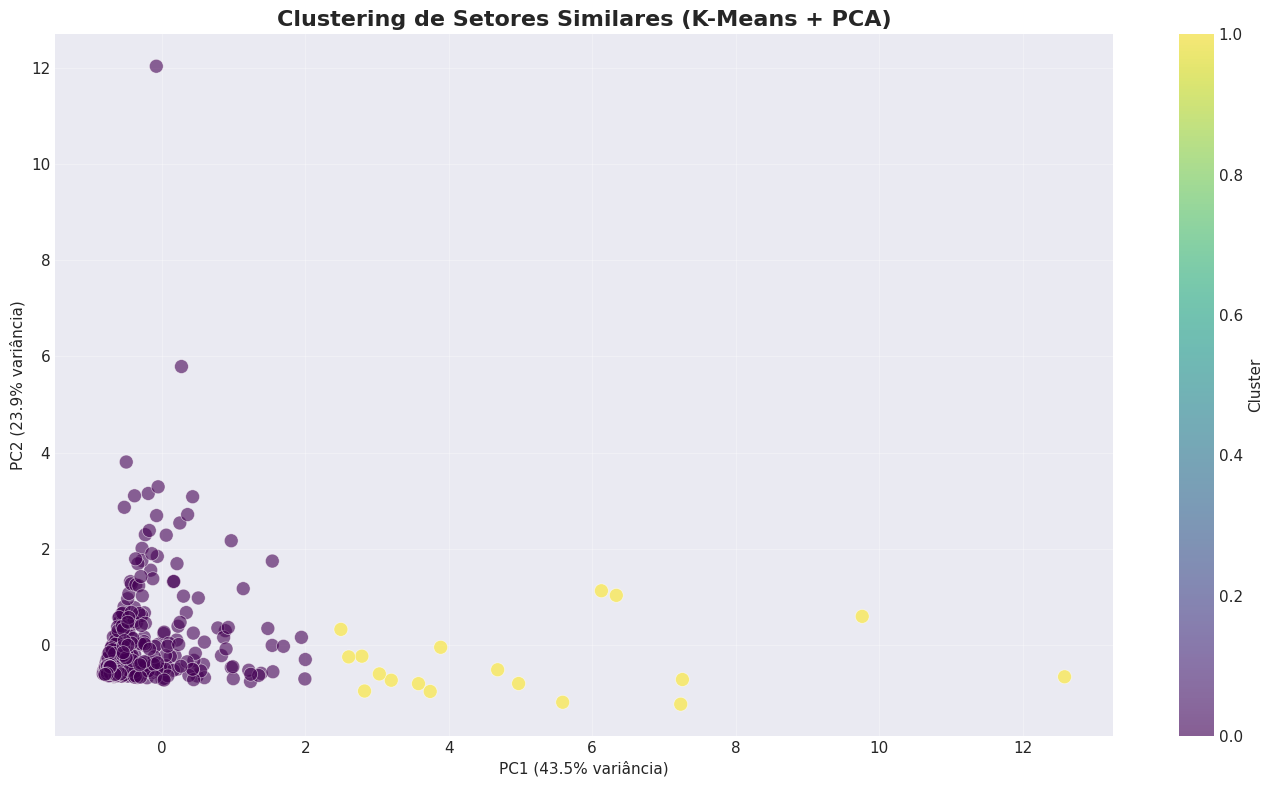


🔍 4.2. DETECÇÃO DE OUTLIERS POR SETOR (ISOLATION FOREST)
--------------------------------------------------------------------------------

⚠️ 34 setores outliers detectados:
--------------------------------------------------------------------------------
                                                                                   desc_cnae_classe  aliq_mediana_media_8m  coef_variacao_temporal  outlier_score
                                                                                  Criação de suínos              95.193425                1.324730      -0.819064
                                          Fabricação de fios, cabos e condutores elétricos isolados              41.528657                1.398508      -0.754873
Representantes comerciais e agentes do comércio de têxteis, vestuário, calçados e artigos de viagem              15.995671                1.605748      -0.715652
                                                         Fabricação de medicamentos para uso hum

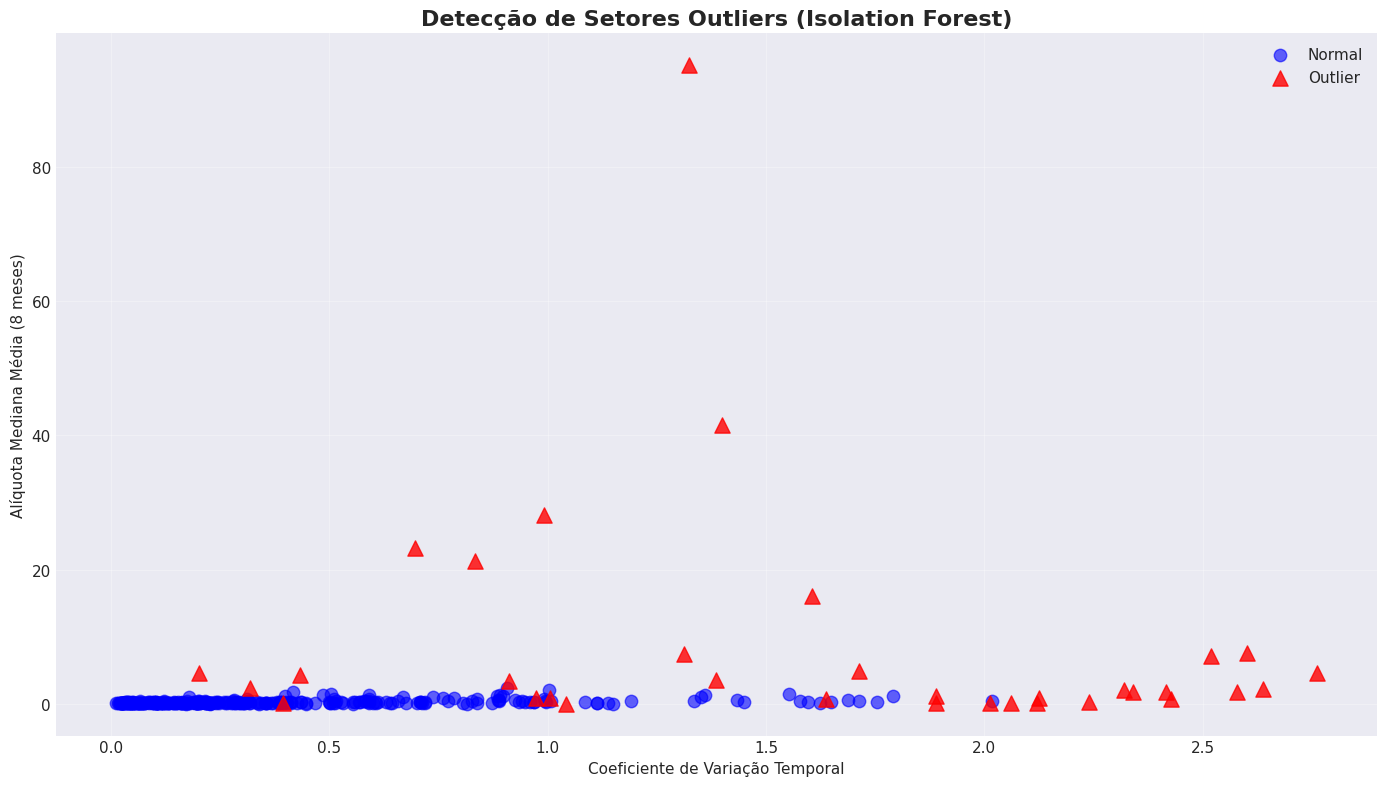


📈 4.3. PREVISÃO DE TENDÊNCIAS DE ALÍQUOTAS
--------------------------------------------------------------------------------


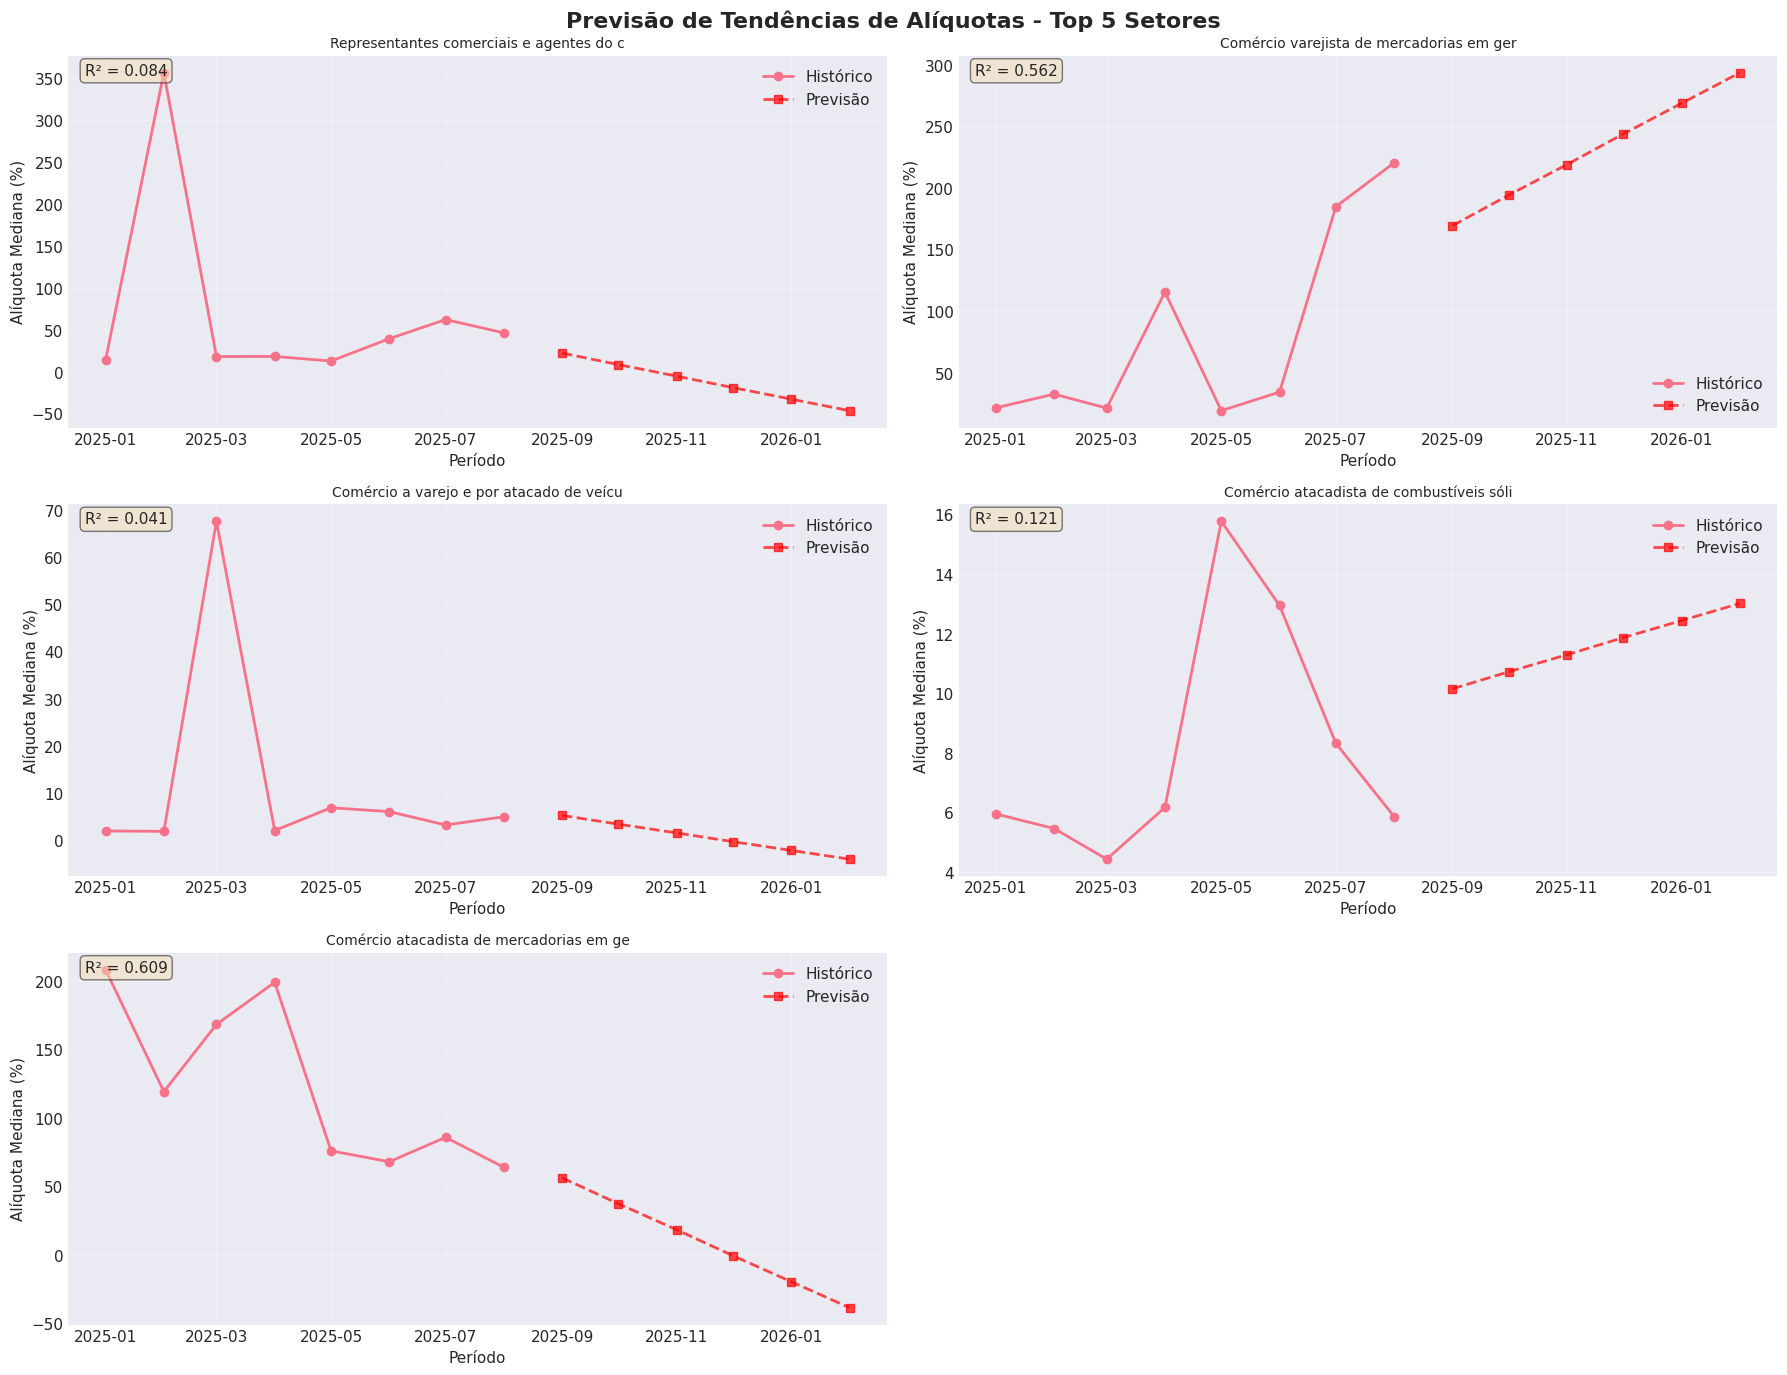


🔗 4.4. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS
--------------------------------------------------------------------------------

MATRIZ DE CORRELAÇÃO:
                 aliq_media  volatilidade  log_faturamento  log_icms  empresas
aliq_media            1.000         0.201            0.047     0.083    -0.032
volatilidade          0.201         1.000            0.080     0.031     0.091
log_faturamento       0.047         0.080            1.000     0.882     0.430
log_icms              0.083         0.031            0.882     1.000     0.388
empresas             -0.032         0.091            0.430     0.388     1.000


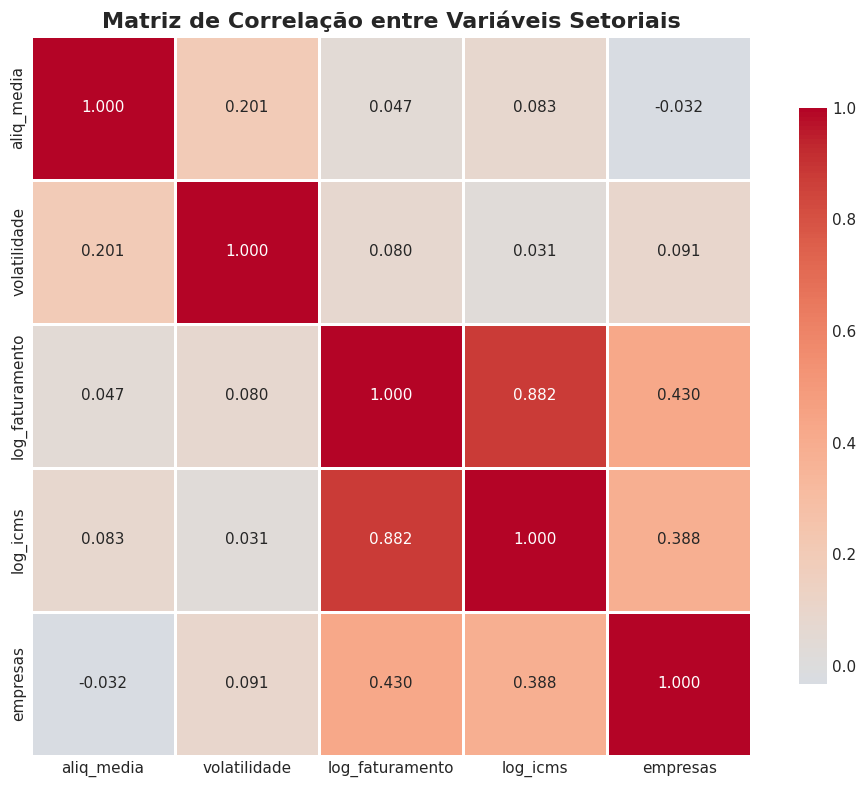


CORRELAÇÕES MAIS FORTES (|r| > 0.5):
--------------------------------------------------------------------------------
  • log_faturamento ↔ log_icms: 0.882


In [12]:
# =============================================================================
# PARTE 4: ANÁLISES ESTATÍSTICAS AVANÇADAS COM MACHINE LEARNING
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 4: ANÁLISES ESTATÍSTICAS AVANÇADAS COM MACHINE LEARNING")
print("=" * 80)

# 4.1. Clustering de Setores Similares
print("\n🔬 4.1. CLUSTERING DE SETORES SIMILARES (K-MEANS)")
print("-" * 80)

# Preparar dados para clustering
df_clustering = spark.sql("""
SELECT 
    cnae_classe,
    desc_cnae_classe,
    aliq_mediana_media_8m,
    coef_variacao_temporal,
    faturamento_acumulado_8m,
    icms_devido_acumulado_8m,
    media_empresas_mes
FROM niat.argos_evolucao_temporal_setor
WHERE aliq_mediana_media_8m IS NOT NULL
  AND coef_variacao_temporal IS NOT NULL
""").toPandas()

# Converter Decimal para float
for col in df_clustering.select_dtypes(include=['object']).columns:
    try:
        df_clustering[col] = df_clustering[col].astype(float)
    except:
        pass  # Manter como string se não for numérico

# Features para clustering
features_cluster = ['aliq_mediana_media_8m', 'coef_variacao_temporal', 
                   'faturamento_acumulado_8m', 'icms_devido_acumulado_8m', 'media_empresas_mes']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering[features_cluster].fillna(0))

# Determinar número ótimo de clusters (método Elbow)
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualizar método Elbow
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Determinação do Número Ótimo de Clusters', fontsize=16, fontweight='bold')

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.set_title('Método Elbow')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Escolher k ótimo (maior silhouette score) - CORREÇÃO AQUI
k_otimo = K_range[np.argmax(silhouette_scores)]
max_silhouette = silhouette_scores[np.argmax(silhouette_scores)]  # Armazenar o valor antes
print(f"\n✅ Número ótimo de clusters: {k_otimo} (Silhouette Score: {max_silhouette:.3f})")

# Aplicar K-Means com k ótimo
kmeans_final = KMeans(n_clusters=k_otimo, random_state=42, n_init=10)
df_clustering['cluster'] = kmeans_final.fit_predict(X_scaled)

# Análise dos clusters
print(f"\nCARACTERÍSTICAS DOS {k_otimo} CLUSTERS IDENTIFICADOS:")
print("-" * 80)

for cluster_id in range(k_otimo):
    cluster_data = df_clustering[df_clustering['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_data)} setores):")
    print(f"  Alíquota Média: {cluster_data['aliq_mediana_media_8m'].mean():.4f}")
    print(f"  Volatilidade Média: {cluster_data['coef_variacao_temporal'].mean():.3f}")
    print(f"  Faturamento Médio: R$ {cluster_data['faturamento_acumulado_8m'].mean()/1e9:.2f} bilhões")
    print(f"  Setores representativos:")
    for setor in cluster_data.nlargest(3, 'faturamento_acumulado_8m')['desc_cnae_classe'].values:
        print(f"    • {setor}")

# Visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustering['cluster'], 
                     cmap='viridis', s=100, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variância)')
plt.title('Clustering de Setores Similares (K-Means + PCA)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.2. Detecção de Outliers por Setor (Isolation Forest)
print("\n🔍 4.2. DETECÇÃO DE OUTLIERS POR SETOR (ISOLATION FOREST)")
print("-" * 80)

# Preparar dados
df_outliers = spark.sql("""
SELECT 
    cnae_classe,
    desc_cnae_classe,
    aliq_mediana_media_8m,
    coef_variacao_temporal,
    LOG(faturamento_acumulado_8m + 1) AS log_faturamento,
    aliq_mediana_max_8m - aliq_mediana_min_8m AS amplitude_aliq
FROM niat.argos_evolucao_temporal_setor
WHERE aliq_mediana_media_8m IS NOT NULL
""").toPandas()

# Converter Decimal para float
for col in ['aliq_mediana_media_8m', 'coef_variacao_temporal', 'log_faturamento', 'amplitude_aliq']:
    df_outliers[col] = df_outliers[col].astype(float)

features_outliers = ['aliq_mediana_media_8m', 'coef_variacao_temporal', 'log_faturamento', 'amplitude_aliq']
X_outliers = df_outliers[features_outliers].fillna(0)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df_outliers['outlier'] = iso_forest.fit_predict(X_outliers)
df_outliers['outlier_score'] = iso_forest.score_samples(X_outliers)

outliers_detectados = df_outliers[df_outliers['outlier'] == -1].sort_values('outlier_score')

print(f"\n⚠️ {len(outliers_detectados)} setores outliers detectados:")
print("-" * 80)
print(outliers_detectados[['desc_cnae_classe', 'aliq_mediana_media_8m', 'coef_variacao_temporal', 'outlier_score']].head(15).to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(14, 8))
normal = df_outliers[df_outliers['outlier'] == 1]
outliers = df_outliers[df_outliers['outlier'] == -1]

ax.scatter(normal['coef_variacao_temporal'], normal['aliq_mediana_media_8m'], 
          c='blue', label='Normal', alpha=0.6, s=80)
ax.scatter(outliers['coef_variacao_temporal'], outliers['aliq_mediana_media_8m'], 
          c='red', label='Outlier', alpha=0.8, s=120, marker='^')

ax.set_xlabel('Coeficiente de Variação Temporal')
ax.set_ylabel('Alíquota Mediana Média (8 meses)')
ax.set_title('Detecção de Setores Outliers (Isolation Forest)', fontsize=16, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.3. Previsão de Tendências de Alíquotas (Regressão Linear)
print("\n📈 4.3. PREVISÃO DE TENDÊNCIAS DE ALÍQUOTAS")
print("-" * 80)

# Selecionar top 5 setores para previsão
top_5_setores = spark.sql("""
SELECT cnae_classe
FROM niat.argos_evolucao_temporal_setor
ORDER BY faturamento_acumulado_8m DESC
LIMIT 5
""").toPandas()['cnae_classe'].tolist()

# Preparar dados de séries temporais
df_series = spark.sql(f"""
SELECT 
    cnae_classe,
    desc_cnae_classe,
    nu_per_ref,
    ROUND(aliq_efetiva_mediana * 100, 2) AS aliq_mediana_pct
FROM niat.argos_benchmark_setorial
WHERE cnae_classe IN ('{"','".join(top_5_setores)}')
ORDER BY cnae_classe, nu_per_ref
""").toPandas()

# Converter para tipos corretos
df_series['aliq_mediana_pct'] = df_series['aliq_mediana_pct'].astype(float)
df_series['periodo_dt'] = pd.to_datetime(df_series['nu_per_ref'], format='%Y%m')
df_series['periodo_num'] = (df_series['periodo_dt'] - df_series['periodo_dt'].min()).dt.days

# Previsão para cada setor
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Previsão de Tendências de Alíquotas - Top 5 Setores', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, setor in enumerate(top_5_setores):
    df_setor = df_series[df_series['cnae_classe'] == setor].copy()
    
    # Treinar modelo
    X = df_setor[['periodo_num']].values
    y = df_setor['aliq_mediana_pct'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Prever próximos 6 meses
    max_periodo = df_setor['periodo_num'].max()
    periodos_futuros = np.arange(max_periodo, max_periodo + 180, 30).reshape(-1, 1)
    previsoes = model.predict(periodos_futuros)
    
    # Plotar
    ax = axes[idx]
    ax.plot(df_setor['periodo_dt'], df_setor['aliq_mediana_pct'], 'o-', label='Histórico', linewidth=2)
    
    datas_futuras = pd.date_range(start=df_setor['periodo_dt'].max() + pd.DateOffset(months=1), periods=6, freq='MS')
    ax.plot(datas_futuras, previsoes, 's--', label='Previsão', linewidth=2, color='red', alpha=0.7)
    
    ax.set_title(df_setor['desc_cnae_classe'].iloc[0][:40], fontsize=10)
    ax.set_xlabel('Período')
    ax.set_ylabel('Alíquota Mediana (%)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # R² score
    r2 = model.score(X, y)
    ax.text(0.02, 0.98, f'R² = {r2:.3f}', transform=ax.transAxes, 
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remover subplot extra
if len(top_5_setores) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# 4.4. Análise de Correlação entre Variáveis
print("\n🔗 4.4. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS")
print("-" * 80)

# Preparar dados
df_correlacao = spark.sql("""
SELECT 
    aliq_mediana_media_8m AS aliq_media,
    coef_variacao_temporal AS volatilidade,
    LOG(faturamento_acumulado_8m + 1) AS log_faturamento,
    LOG(icms_devido_acumulado_8m + 1) AS log_icms,
    media_empresas_mes AS empresas
FROM niat.argos_evolucao_temporal_setor
WHERE aliq_mediana_media_8m IS NOT NULL
""").toPandas()

# Matriz de correlação
correlation_matrix = df_correlacao.corr()

print("\nMATRIZ DE CORRELAÇÃO:")
print(correlation_matrix.round(3))

# Visualização
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis Setoriais', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlações mais fortes - CORREÇÃO AQUI
print("\nCORRELAÇÕES MAIS FORTES (|r| > 0.5):")
print("-" * 80)

# Usar numpy.abs em vez da função abs do Python (que está sendo sobrescrita pelo PySpark)
import builtins
abs_builtin = builtins.abs  # Salvar referência à função built-in

correlacoes_fortes = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        # Usar abs_builtin ou np.abs
        if abs_builtin(corr_value) > 0.5:
            correlacoes_fortes.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlacao': corr_value
            })

if len(correlacoes_fortes) > 0:
    for item in correlacoes_fortes:
        print(f"  • {item['var1']} ↔ {item['var2']}: {item['correlacao']:.3f}")
else:
    print("  Nenhuma correlação forte (|r| > 0.5) detectada.")


PARTE 5: ANÁLISES ESPECÍFICAS ADICIONAIS

📊 5.1. ANÁLISE DE VARIÂNCIA ENTRE PORTES
--------------------------------------------------------------------------------
cnae_classe                                                                                                       desc_cnae_classe  variancia_aliq_entre_portes          amplitude_aliq
      10660                                                                                   Fabricação de alimentos para animais                   208.239612 418.9443795162591552184
      47822                                                                     Comércio varejista de calçados e artigos de viagem                   102.439079 177.4344412964073343222
      10511                                                                                                    Preparação do leite                    82.596633 143.1386344018924392541
      47113 Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios 

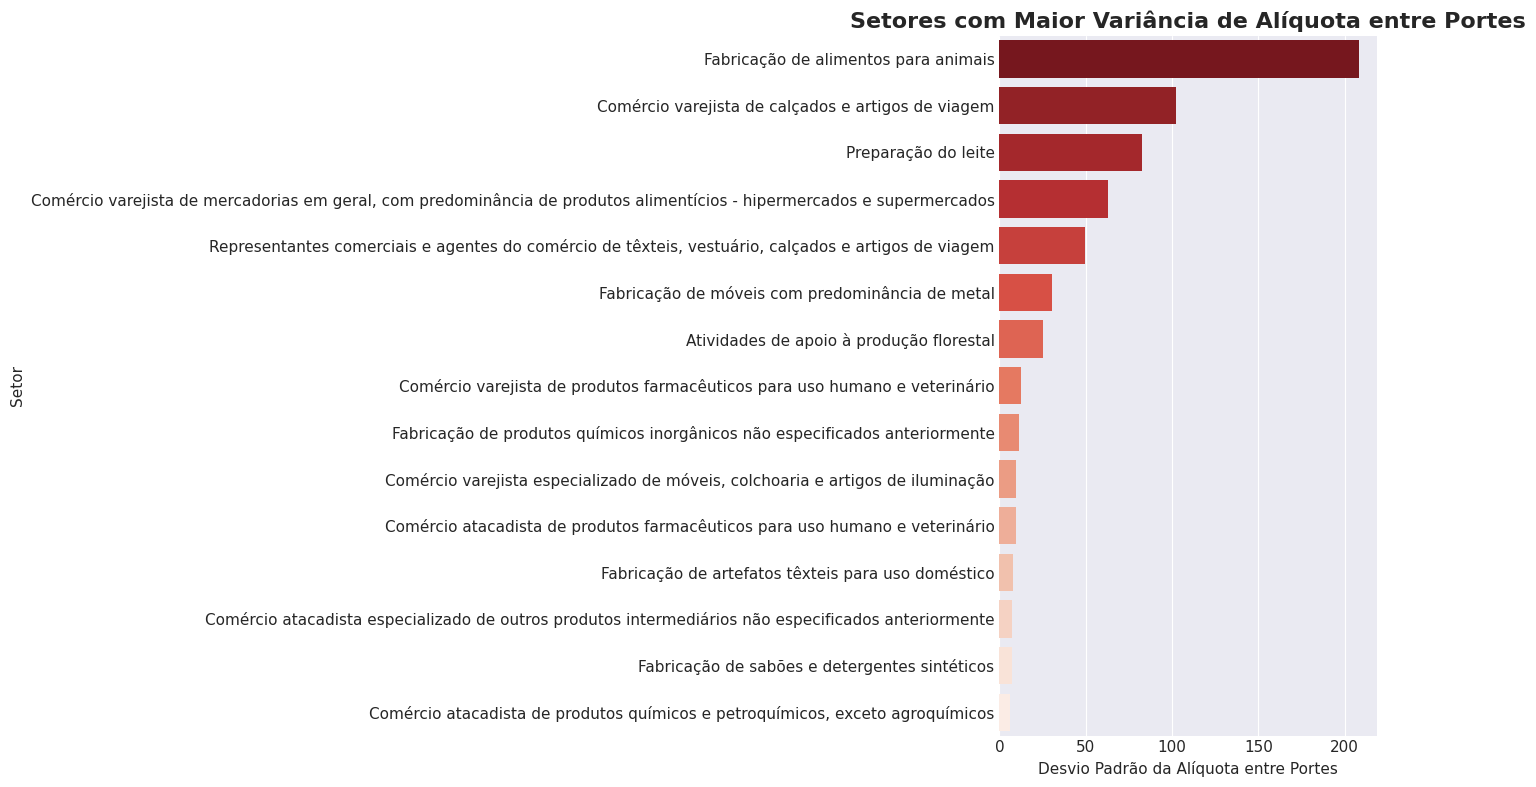


🎯 5.2. SCORE DE RISCO COMPOSTO (ML-ENHANCED)
--------------------------------------------------------------------------------

TOP 20 EMPRESAS POR SCORE ML:
--------------------------------------------------------------------------------
                                          nm_razao_social cnae_classe porte_empresa status_vs_setor categoria_volatilidade  score_ml
                  DINAMAR - PECAS E SERVICOS MARILIA LTDA       45307         MEDIO          NORMAL                  BAIXA     100.0
             BATIKI COMERCIO IMPORTACAO E EXPORTACAO LTDA       46494       PEQUENO          NORMAL                   ALTA     100.0
                       TECNOBLU INDÚSTRIA E COMÉRCIO LTDA       14126        GRANDE          NORMAL                  BAIXA     100.0
                                    VIDRACARIA ATUAL LTDA       47431         MEDIO          NORMAL                  BAIXA     100.0
                            AHS INDUSTRIA E SERVICOS LTDA       46818         MEDIO          NOR

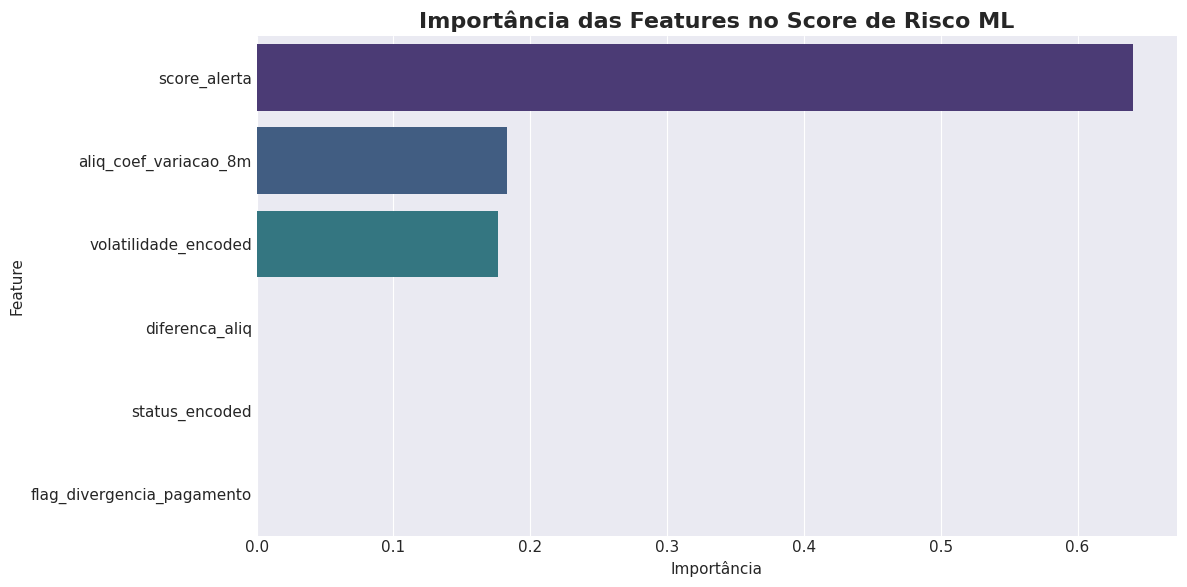

In [16]:
# =============================================================================
# PARTE 5: ANÁLISES ESPECÍFICAS ADICIONAIS
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 5: ANÁLISES ESPECÍFICAS ADICIONAIS")
print("=" * 80)

# 5.1. Análise de Variância entre Portes dentro do Setor
print("\n📊 5.1. ANÁLISE DE VARIÂNCIA ENTRE PORTES")
print("-" * 80)

variancia_porte = spark.sql("""
SELECT 
    bp.cnae_classe,
    b.desc_cnae_classe,
    STDDEV(bp.aliq_efetiva_mediana) AS variancia_aliq_entre_portes,
    MAX(bp.aliq_efetiva_mediana) - MIN(bp.aliq_efetiva_mediana) AS amplitude_aliq
FROM niat.argos_benchmark_setorial_porte bp
INNER JOIN niat.argos_benchmark_setorial b 
    ON bp.cnae_classe = b.cnae_classe AND bp.nu_per_ref = b.nu_per_ref
WHERE bp.nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_benchmark_setorial_porte)
GROUP BY bp.cnae_classe, b.desc_cnae_classe
HAVING COUNT(DISTINCT bp.porte_empresa) >= 3
ORDER BY variancia_aliq_entre_portes DESC
LIMIT 15
""").toPandas()

print(variancia_porte.to_string(index=False))

# Visualização
plt.figure(figsize=(14, 8))
sns.barplot(data=variancia_porte, y='desc_cnae_classe', x='variancia_aliq_entre_portes', palette='Reds_r')
plt.title('Setores com Maior Variância de Alíquota entre Portes', fontsize=16, fontweight='bold')
plt.xlabel('Desvio Padrão da Alíquota entre Portes')
plt.ylabel('Setor')
plt.tight_layout()
plt.show()

# 5.2. Score de Risco Composto (ML-Enhanced)
print("\n🎯 5.2. SCORE DE RISCO COMPOSTO (ML-ENHANCED)")
print("-" * 80)

# Calcular score usando múltiplos fatores
df_score = spark.sql("""
SELECT 
    e.nu_cnpj,
    e.nm_razao_social,
    e.cnae_classe,
    e.porte_empresa,
    e.aliq_efetiva_empresa,
    e.aliq_setor_mediana,
    e.status_vs_setor,
    ete.categoria_volatilidade,
    ete.aliq_coef_variacao_8m,
    e.flag_divergencia_pagamento,
    COALESCE(a.score_risco, 0) AS score_alerta
FROM niat.argos_empresa_vs_benchmark e
LEFT JOIN niat.argos_evolucao_temporal_empresa ete ON e.nu_cnpj = ete.nu_cnpj
LEFT JOIN niat.argos_alertas_empresas a ON e.nu_cnpj = a.nu_cnpj AND e.nu_per_ref = a.nu_per_ref
WHERE e.nu_per_ref = (SELECT MAX(nu_per_ref) FROM niat.argos_empresa_vs_benchmark)
  AND e.aliq_efetiva_empresa IS NOT NULL
""").toPandas()

# Criar features para o modelo - CORREÇÃO AQUI
df_score['diferenca_aliq'] = abs_builtin(df_score['aliq_efetiva_empresa'] - df_score['aliq_setor_mediana'])
# OU usando numpy (também funciona):
# df_score['diferenca_aliq'] = np.abs(df_score['aliq_efetiva_empresa'] - df_score['aliq_setor_mediana'])

df_score['status_encoded'] = df_score['status_vs_setor'].map({
    'MUITO_ABAIXO': 5, 'ABAIXO': 3, 'NORMAL': 1, 'ACIMA': 2, 'MUITO_ACIMA': 4, 'SEM_DADOS': 0
})
df_score['volatilidade_encoded'] = df_score['categoria_volatilidade'].map({
    'ALTA': 3, 'MEDIA': 2, 'BAIXA': 1, 'SEM_DADOS': 0
})

# Random Forest para score composto
features_rf = ['diferenca_aliq', 'status_encoded', 'volatilidade_encoded', 
              'aliq_coef_variacao_8m', 'flag_divergencia_pagamento', 'score_alerta']

X_score = df_score[features_rf].fillna(0)

# Criar target sintético baseado em múltiplos critérios
df_score['risco_alto'] = (
    (df_score['status_vs_setor'] == 'MUITO_ABAIXO') | 
    (df_score['volatilidade_encoded'] >= 2) |
    (df_score['flag_divergencia_pagamento'] == 1)
).astype(int)

y_score = df_score['risco_alto']

# Treinar Random Forest
rf_score = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_score.fit(X_score, y_score)

# Prever score
df_score['score_ml'] = rf_score.predict(X_score) * 100

# Top empresas por score ML
top_score_ml = df_score.nlargest(20, 'score_ml')[['nm_razao_social', 'cnae_classe', 'porte_empresa', 
                                                    'status_vs_setor', 'categoria_volatilidade', 'score_ml']]

print("\nTOP 20 EMPRESAS POR SCORE ML:")
print("-" * 80)
print(top_score_ml.to_string(index=False))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features_rf,
    'importance': rf_score.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Importância das Features no Score de Risco ML', fontsize=16, fontweight='bold')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [17]:
# =============================================================================
# PARTE 6: RESUMO EXECUTIVO E EXPORTAÇÃO
# =============================================================================
print("\n" + "=" * 80)
print("PARTE 6: RESUMO EXECUTIVO")
print("=" * 80)

resumo_executivo = f"""
╔════════════════════════════════════════════════════════════════════════════╗
║           SISTEMA DE ANÁLISE TRIBUTÁRIA SETORIAL v4.0                     ║
║                    RESUMO EXECUTIVO DA ANÁLISE                             ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 MÉTRICAS GERAIS:
  • Total de Setores Analisados: {stats_gerais['total_setores'].iloc[0]:,}
  • Total de Empresas: {stats_gerais['total_empresas'].iloc[0]:,}
  • Faturamento Total: R$ {stats_gerais['faturamento_total_bilhoes'].iloc[0]:.2f} bilhões
  • ICMS Devido Total: R$ {stats_gerais['icms_devido_bilhoes'].iloc[0]:.2f} bilhões
  • Alíquota Média do Sistema: {stats_gerais['aliq_media_sistema_pct'].iloc[0]:.2f}%

🔬 ANÁLISES DE MACHINE LEARNING:
  • Clusters de Setores Identificados: {k_otimo}
  • Setores Outliers Detectados: {len(outliers_detectados)}
  • Empresas com Alto Risco (ML): {(df_score['score_ml'] > 70).sum():,}

⚠️ ALERTAS CRÍTICOS:
  • Empresas em Risco Crítico: {stats_gerais['empresas_risco_critico'].iloc[0]:,}
  • Setores com Anomalias: {len(anomalias_ranking)}
  • Divergências ICMS vs Pagamentos: {divergencias['qtd_empresas'].sum():,} empresas

📈 TENDÊNCIAS IDENTIFICADAS:
  • Setores com Alta Volatilidade: {(df_clustering['coef_variacao_temporal'] > 0.3).sum()}
  • Correlação Faturamento-ICMS: {correlation_matrix.loc['log_faturamento', 'log_icms']:.3f}

💡 RECOMENDAÇÕES:
  1. Priorizar fiscalização dos {len(outliers_detectados)} setores outliers
  2. Monitorar empresas com score ML > 70 ({(df_score['score_ml'] > 70).sum():,} casos)
  3. Investigar divergências ICMS em {divergencias.iloc[0]['qtd_empresas']} empresas
  4. Analisar clusters de setores para ações setoriais coordenadas

══════════════════════════════════════════════════════════════════════════════
Análise concluída em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
══════════════════════════════════════════════════════════════════════════════
"""

print(resumo_executivo)

# Salvar resumo em arquivo (opcional)
# with open('/tmp/argos_resumo_executivo.txt', 'w', encoding='utf-8') as f:
#     f.write(resumo_executivo)
# print("\n✅ Resumo executivo salvo em: /tmp/argos_resumo_executivo.txt")

print("\n" + "=" * 80)
print("✅ ANÁLISE COMPLETA FINALIZADA COM SUCESSO!")
print("=" * 80)
print("\nPRÓXIMOS PASSOS:")
print("  1. Utilizar os DataFrames gerados para análises específicas")
print("  2. Exportar resultados para dashboards (Streamlit/PowerBI)")
print("  3. Implementar sistema de monitoramento contínuo")
print("  4. Integrar com sistema de alertas automáticos")
print("\n" + "=" * 80)


PARTE 6: RESUMO EXECUTIVO

╔════════════════════════════════════════════════════════════════════════════╗
║           SISTEMA DE ANÁLISE TRIBUTÁRIA SETORIAL v4.0                     ║
║                    RESUMO EXECUTIVO DA ANÁLISE                             ║
╚════════════════════════════════════════════════════════════════════════════╝

📊 MÉTRICAS GERAIS:
  • Total de Setores Analisados: 342
  • Total de Empresas: 71,631
  • Faturamento Total: R$ 100.89 bilhões
  • ICMS Devido Total: R$ 11.84 bilhões
  • Alíquota Média do Sistema: 57.01%

🔬 ANÁLISES DE MACHINE LEARNING:
  • Clusters de Setores Identificados: 2
  • Setores Outliers Detectados: 34
  • Empresas com Alto Risco (ML): 18,936

⚠️ ALERTAS CRÍTICOS:
  • Empresas em Risco Crítico: 5,525
  • Setores com Anomalias: 20
  • Divergências ICMS vs Pagamentos: 32,259 empresas

📈 TENDÊNCIAS IDENTIFICADAS:
  • Setores com Alta Volatilidade: 164
  • Correlação Faturamento-ICMS: 0.882

💡 RECOMENDAÇÕES:
  1. Priorizar fiscalização dos 3